Note that Connected Components assigns component id for the undirected graphs (if you run it on directed graphs it will still consider graph as undirected)

In [0]:
import networkx as nx
import matplotlib.pyplot as plt

from graphframes import GraphFrame

In [0]:
def plot_graph(gf):
  
  gplot = nx.DiGraph()
  edge_labels = {}
  
  plt.figure(figsize=(5, 5))
  for node in gf.vertices.select('id').take(1000):
    gplot.add_node(node['id'])
 
  for row in gf.edges.select('src', 'dst', 'distance').take(1000):
    gplot.add_edge(row['src'], row['dst'])
    edge_labels[(row['src'], row['dst'])] = row['distance']
       
  pos = nx.shell_layout(gplot)
  
  nx.draw(gplot,
          pos,
          with_labels=True, 
          font_weight='bold', 
          node_size=1800, 
          font_size=15, 
          width=2)
    
  nx.draw_networkx_edge_labels(gplot,
                               pos,
                               edge_labels=edge_labels,
                               font_color='green',
                               font_size=10,
                               font_weight='bold')

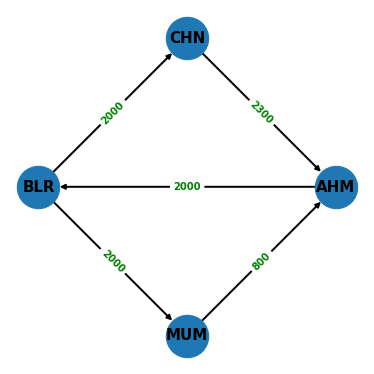

In [0]:
vertices = spark.createDataFrame([("BLR", "Bangalore", 20),
                                  ("MUM", "Mumbai", 25),
                                  ("AHM", "Ahmedabad", 4),
                                  ("CHN", "Chennai", 21)], ["id", "city", "population"])

edges = spark.createDataFrame([("BLR", "MUM", 2000),
                               ("MUM", "AHM", 800),
                               ("AHM", "BLR", 2000),
                               ("BLR", "CHN", 2000),
                               ("CHN", "AHM", 2300)], ["src", "dst", "distance"])

cities = GraphFrame(vertices, edges)

plot_graph(cities)

In [0]:
# before you can run connectedComponents() you need to set checkpoint directory
# due to all nodes are connected it will assign a single (same) component id for all nodes
sc.setCheckpointDir("/tmp/graphframes-example-connected-components")

components = cities.connectedComponents() # it consider directed graph as undirected

components.display()

id,city,population,component
BLR,Bangalore,20,532575944704
MUM,Mumbai,25,532575944704
AHM,Ahmedabad,4,532575944704
CHN,Chennai,21,532575944704


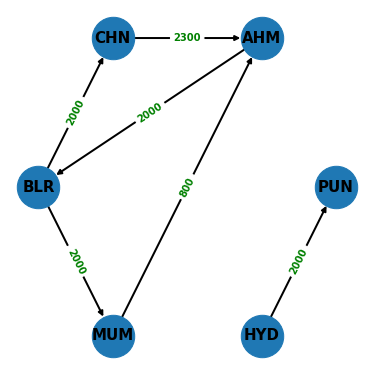

In [0]:
# anothe graph
vertices = spark.createDataFrame([("BLR", "Bangalore", 20),
                                  ("MUM", "Mumbai", 25),
                                  ("HYD", "Hyderabad", 15),
                                  ("PUN", "Pune", 7),
                                  ("AHM", "Ahmedabad", 4),
                                  ("CHN", "Chennai", 21)], ["id", "city", "population"])

edges = spark.createDataFrame([("BLR", "MUM", 2000),
                               ("MUM", "AHM", 800),
                               ("HYD", "PUN", 2000),
                               ("AHM", "BLR", 2000),
                               ("BLR", "CHN", 2000),
                               ("CHN", "AHM", 2300)], ["src", "dst", "distance"])

cities = GraphFrame(vertices, edges)

plot_graph(cities)

In [0]:
# as graph above shows that we have 2 disconected components (parts of graph), the query returns 2 different component numbers (ids) assigned to # nodes 
components = cities.connectedComponents()

components.display()

id,city,population,component
BLR,Bangalore,20,532575944704
MUM,Mumbai,25,532575944704
HYD,Hyderabad,15,944892805120
PUN,Pune,7,944892805120
AHM,Ahmedabad,4,532575944704
CHN,Chennai,21,532575944704


Strongly Connected Components - if every vertex is reachable from every vartex. Applies just for directed graphs

In [0]:
# find stronglyConnectedComponents - applies only for directed graphs. 4 edges will get the same component number (they all are strongly connected with each other). All remains will get different component numbers 
components = cities.stronglyConnectedComponents(maxIter=10)

components.display()

id,city,population,component
AHM,Ahmedabad,4,532575944704
BLR,Bangalore,20,532575944704
MUM,Mumbai,25,532575944704
PUN,Pune,7,944892805120
HYD,Hyderabad,15,1271310319616
CHN,Chennai,21,532575944704
